# PLANT DISEASE CLASSIFIER - LOAD TRAINED MODEL

## 1. Import Modules

In [13]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

## 2. Load Model from Disk

In [5]:
model = load_model("pdc2.h5")

## 3. Load Data Generator

In [9]:
my_data_dir = 'C:\\plant_diseases'
test_path = my_data_dir+'\\valid\\'
train_path = my_data_dir+'\\train\\'
image_shape = (256, 256, 3)
batch_size = 16

image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

print("Training Images: ", end='')
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')

print("Testing Images: ", end='')
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)

Training Images: Found 70295 images belonging to 38 classes.
Testing Images: Found 17572 images belonging to 38 classes.


## 4. Display Classes in DataFrame

In [10]:
df = pd.DataFrame(train_image_gen.class_indices.items())
df.rename(columns={1:"Index", 0:"Class Name"}, inplace=True)
df.set_index(inplace=True, keys="Index")
df

,Class Name
Index,
0,Apple___Apple_scab
1,Apple___Black_rot
2,Apple___Cedar_apple_rust
3,Apple___healthy
4,Blueberry___healthy
5,Cherry_(including_sour)___Powdery_mildew
6,Cherry_(including_sour)___healthy
7,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...
8,Corn_(maize)___Common_rust_


## 5. Load image for prediction

Min Value: 0.0
Max Value: 0.99609375


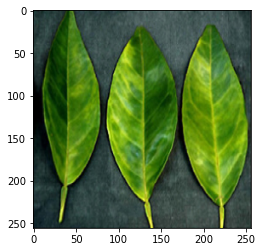

In [85]:
image_to_predict = image.load_img('C:\\plant_diseases\\post_train_testing\\orange_citrus4.JPG', target_size=(256,256))
image_to_predict = np.expand_dims(image_to_predict, axis=1)
image_to_predict = image_to_predict.reshape(256, 256, 3)
image_to_predict = image_to_predict / 256
plt.imshow(image_to_predict)
print("Min Value: " + str(image_to_predict.min()))
print("Max Value: " + str(image_to_predict.max()))

## 6. Run Prediction

In [87]:
prediction = model.predict(image_to_predict.reshape(1, 256, 256, 3))
predicted_index = prediction.argmax(axis=1)[0]
print("Predicted class: " + list(train_image_gen.class_indices.keys())[predicted_index])
print("Confidence: " + str(round(prediction.max(axis=1)[0] * 100, 2)) + "%")

Predicted class: Orange___Haunglongbing_(Citrus_greening)
Confidence: 95.51%
